In [198]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [199]:
transactions_im = pd.read_csv('transactions_cluster4.csv', header=0)

In [200]:
transactions = transactions_im.fillna(0)

In [201]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%Y-%m-%d')
transactions = transactions.set_index('date')

In [260]:
ts = transactions.mean(axis=1)
ts

date
2017-04-20    740.250000
2017-04-21    785.500000
2017-04-22    873.833333
2017-04-23    822.083333
2017-04-24    731.166667
2017-04-25    734.500000
2017-04-26    745.583333
2017-04-27    713.000000
2017-04-28    750.333333
2017-04-29    964.333333
2017-04-30    886.333333
2017-05-01    891.500000
2017-05-02    824.000000
2017-05-03    788.416667
2017-05-04    738.083333
2017-05-05    712.916667
2017-05-06    879.916667
2017-05-07    866.416667
2017-05-08    758.416667
2017-05-09    751.666667
2017-05-10    733.666667
2017-05-11    743.583333
2017-05-12    766.416667
2017-05-13    982.750000
2017-05-14    903.583333
2017-05-15    775.583333
2017-05-16    785.250000
2017-05-17    766.333333
2017-05-18    709.750000
2017-05-19    748.416667
                 ...    
2017-07-17    761.083333
2017-07-18    754.416667
2017-07-19    715.333333
2017-07-20    718.666667
2017-07-21    746.666667
2017-07-22    883.666667
2017-07-23    830.333333
2017-07-24    765.166667
2017-07-25    738.08

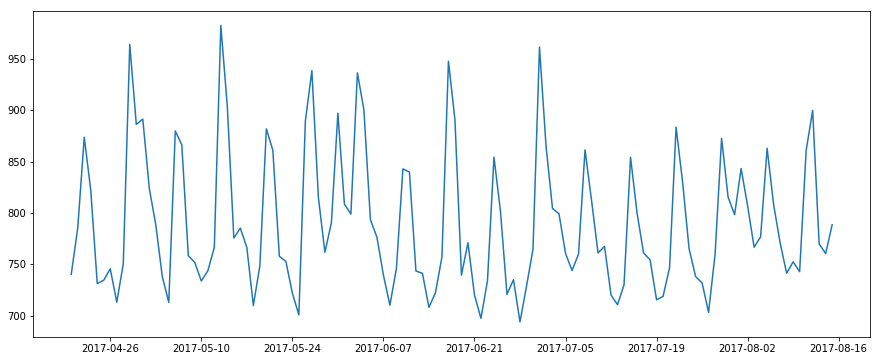

In [203]:
plt.plot(ts.index.to_pydatetime(), ts.values)

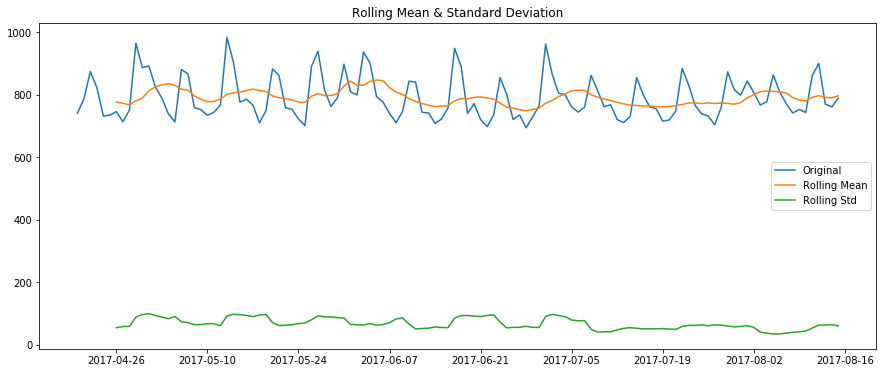

In [204]:
rolmean = ts.rolling(window=7).mean()
rolstd = ts.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [205]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=10)
    rolstd = pd.rolling_std(timeseries, window=10)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  """


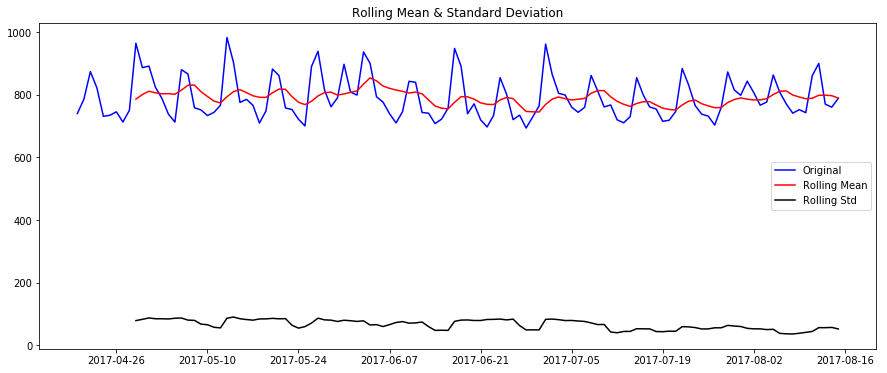

Results of Dickey-Fuller Test:
Test Statistic                  -1.882945
p-value                          0.340126
#Lags Used                      13.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [206]:
test_stationarity(ts)

In [207]:
ts_log = np.log(ts)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  """


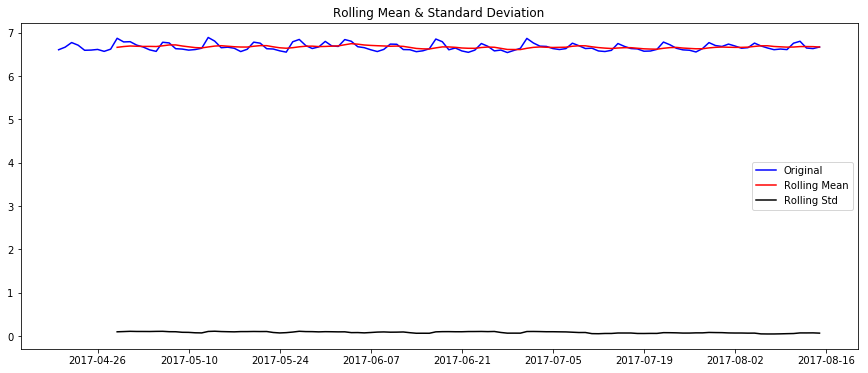

Results of Dickey-Fuller Test:
Test Statistic                  -1.905755
p-value                          0.329359
#Lags Used                      13.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [208]:
test_stationarity(ts_log)

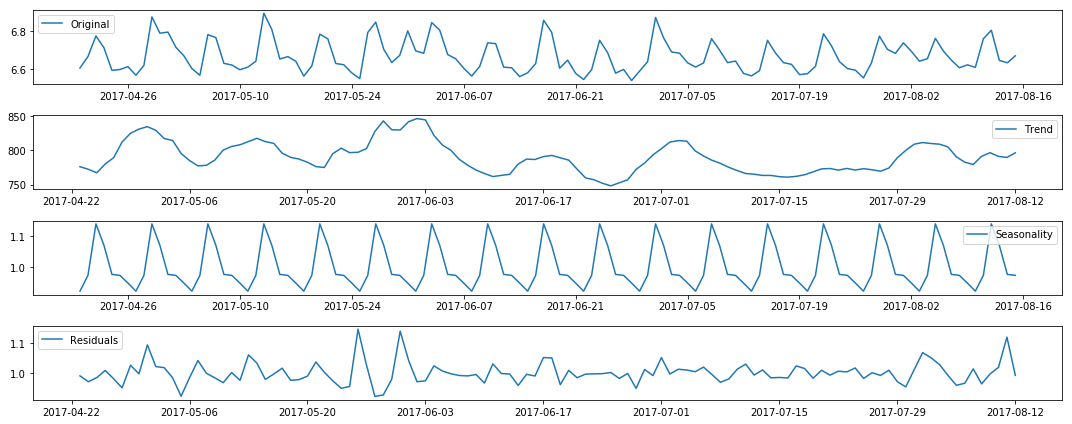

In [209]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

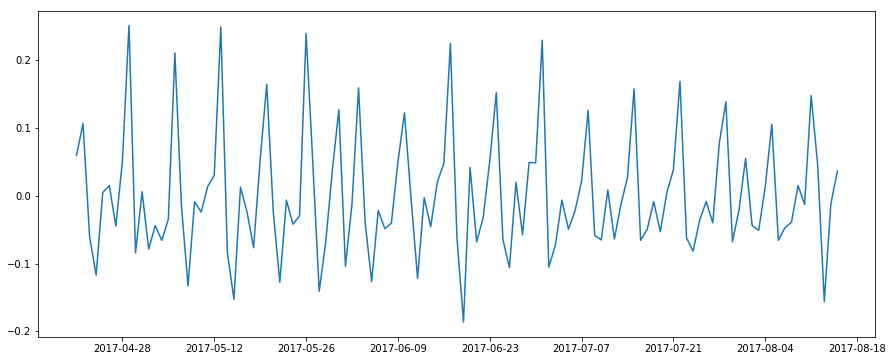

In [210]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  """


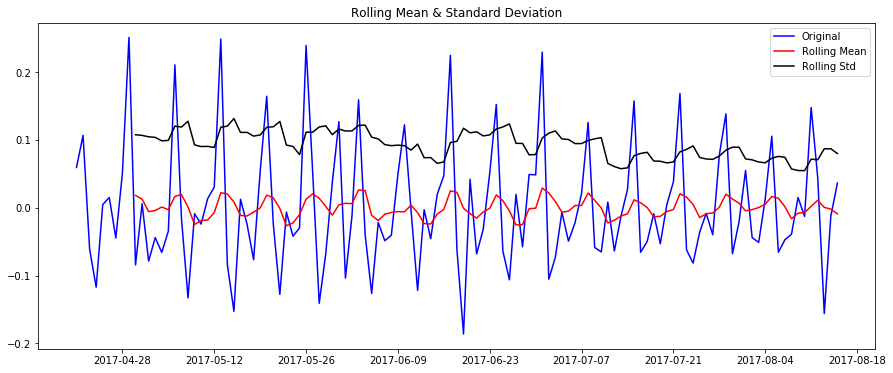

Results of Dickey-Fuller Test:
Test Statistic                  -4.881533
p-value                          0.000038
#Lags Used                      13.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


In [211]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

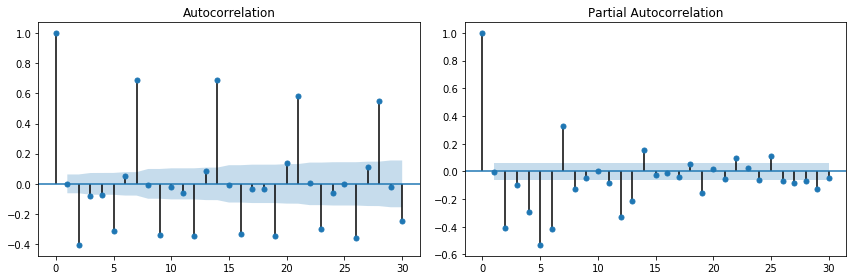

In [212]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [213]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [214]:
# fix random seed for reproducibility
np.random.seed(7)

In [215]:
ts_log_lstm=ts_log.values

In [216]:
ts_log_lstm = ts_log_lstm.astype('float32')
ts_log_lstm=ts_log_lstm.reshape(-1,1)

In [217]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(ts_log_lstm)

In [218]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

79 39


In [219]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [220]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [221]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.1615
Epoch 2/100
 - 0s - loss: 0.1091
Epoch 3/100
 - 0s - loss: 0.0796
Epoch 4/100
 - 0s - loss: 0.0654
Epoch 5/100
 - 0s - loss: 0.0602
Epoch 6/100
 - 0s - loss: 0.0588
Epoch 7/100
 - 0s - loss: 0.0584
Epoch 8/100
 - 0s - loss: 0.0584
Epoch 9/100
 - 0s - loss: 0.0580
Epoch 10/100
 - 0s - loss: 0.0580
Epoch 11/100
 - 0s - loss: 0.0578
Epoch 12/100
 - 0s - loss: 0.0577
Epoch 13/100
 - 0s - loss: 0.0580
Epoch 14/100
 - 0s - loss: 0.0577
Epoch 15/100
 - 0s - loss: 0.0573
Epoch 16/100
 - 0s - loss: 0.0573
Epoch 17/100
 - 0s - loss: 0.0574
Epoch 18/100
 - 0s - loss: 0.0573
Epoch 19/100
 - 0s - loss: 0.0571
Epoch 20/100
 - 0s - loss: 0.0574
Epoch 21/100
 - 0s - loss: 0.0570
Epoch 22/100
 - 0s - loss: 0.0573
Epoch 23/100
 - 0s - loss: 0.0572
Epoch 24/100
 - 0s - loss: 0.0569
Epoch 25/100
 - 0s - loss: 0.0570
Epoch 26/100
 - 0s - loss: 0.0571
Epoch 27/100
 - 0s - loss: 0.0569
Epoch 28/100
 - 0s - loss: 0.0568
Epoch 29/100
 - 0s - loss: 0.0568
Epoch 30/100
 - 0s - lo

In [222]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [223]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [224]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.08 RMSE
Test Score: 0.06 RMSE


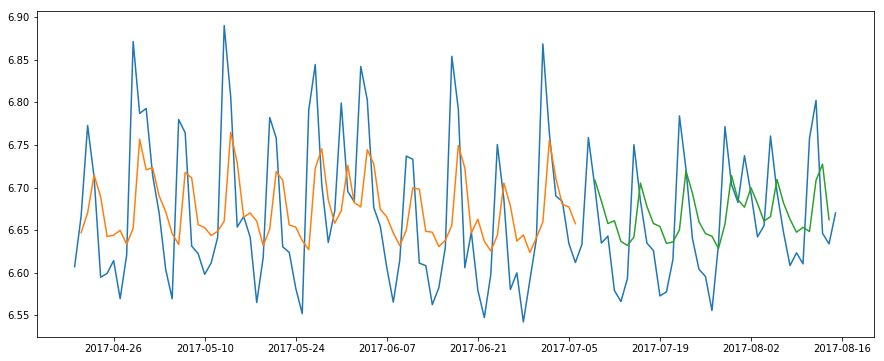

In [225]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(ts_log.index.to_pydatetime(),ts_log.values)
plt.plot(ts_log.index.to_pydatetime(),trainPredictPlot)
plt.plot(ts_log.index.to_pydatetime(),testPredictPlot)
plt.show()

In [247]:
trainD=trainPredictPlot.tolist()

In [249]:
trainD=trainPredictPlot.tolist()
trainD1=pd.DataFrame(trainD)

In [250]:
trainD1=trainD1.dropna()

In [251]:
trainD=list(trainD1[0])

In [252]:
testD=testPredictPlot.tolist()
testD1=pd.DataFrame(testD)

In [253]:
testD1=testD1.dropna()

In [254]:
testD=list(testD1[0])

In [258]:
predictions=pd.DataFrame({'Predicted values': trainD})

In [259]:
predictions

,Predicted values
0,6.647042
1,6.670316
2,6.714822
3,6.689041
4,6.642413
5,6.644108
6,6.649771
7,6.633253
8,6.652208
9,6.756806


In [71]:
trainPredict=trainPredict.reshape(1,-1)
testPredict=testPredict.reshape(1,-1)

In [79]:
#trainPredict=trainPredict.tolist()
testPredict=testPredict.tolist()

In [81]:
trainY

array([[ 6.66632061,  6.77288945,  6.71184162,  6.59464127,  6.59918985,
         6.61416669,  6.56948127,  6.62051797,  6.87143716,  6.78709314,
         6.79290506,  6.71417038,  6.67002696,  6.60405659,  6.56936436,
         6.77982723,  6.76436617,  6.6312325 ,  6.62229276,  6.5980547 ,
         6.61148058,  6.64172586,  6.89035482,  6.80636815,  6.6536154 ,
         6.66600245,  6.64161759,  6.56491276,  6.61796005,  6.78219252,
         6.75819092,  6.63035374,  6.62384372,  6.58179458,  6.5519133 ,
         6.79103396,  6.84446052,  6.70349503,  6.63550875,  6.67256029,
         6.79933472,  6.69548984,  6.6832569 ,  6.8422387 ,  6.80295007,
         6.67645329,  6.65468945,  6.6059742 ,  6.56538236,  6.61483689,
         6.73696708,  6.73320361,  6.61125674,  6.60822524,  6.56244452,
         6.58225555,  6.62958324,  6.85417873,  6.7920635 ,  6.60586194,
         6.6475803 ,  6.57948243,  6.54726376,  6.59839544,  6.75051651,
         6.68648501,  6.58017654,  6.59975709,  6.5

In [80]:
trainPredict=trainPredict.append(testPredict)